In [1]:
import matplotlib.pyplot as plt
from labvision import camera, images
import numpy as np
from scipy import ndimage

In [2]:
cam = camera.Camera(camera.guess_camera_number())

In [3]:
frame = cam.get_frame()

In [4]:
frame = ndimage.rotate(frame, -120, reshape=False)
crop_result = images.crop_polygon(frame)

In [5]:
crop, mask = crop_result.bbox, crop_result.mask

In [6]:
frame = images.crop(frame, crop_result.bbox)

In [7]:
def get_frame():
    frame = cam.get_frame()
    frame = ndimage.rotate(frame, -120, reshape=False)
    frame = images.crop(frame, crop)
    return frame

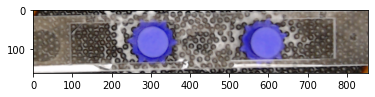

In [8]:
frame = get_frame()
plt.imshow(frame)

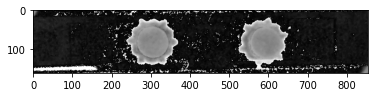

In [9]:
red = frame[:, :, 0] - frame[:, :, 2]
plt.imshow(red, cmap='gray')

In [15]:
images.ThresholdGui(red)

In [16]:
red = images.threshold(red, 65)

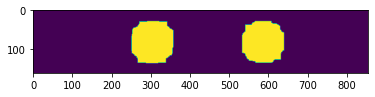

In [17]:
opened = images.opening(red, (31, 31))
plt.imshow(opened)

In [18]:
im1, im2 = opened[:, :400], opened[:, 400:]

In [19]:
m1 = list(images.center_of_mass(im1))
m2 = list(images.center_of_mass(im2))
m2[0] = m2[0] + 400

In [20]:
m1, m2

([303, 80], [585, 80])

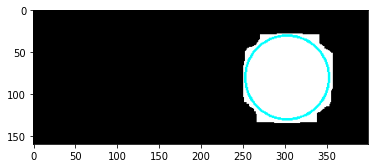

In [21]:
im1 = images.draw_circle(images.gray_to_bgr(im1), *m1, 50)
images.plot(im1)

In [22]:
frame = images.draw_circle(frame, *m1, 50)

In [23]:
frame = images.draw_circle(frame, *m2, 50)

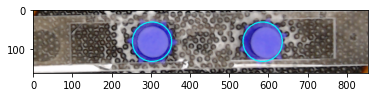

In [24]:
images.plot(frame)